In [516]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28778496d0>,
      dtype=object)

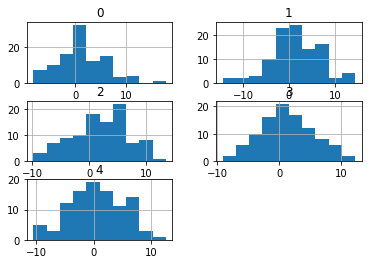

In [527]:
# n=400
# u1=pd.DataFrame(np.random.normal(low=-1,high=1,size=(n,5)))
# y1=pd.DataFrame([0]*n,columns=['labels'])
# s1=pd.concat([u1,y1],axis=1)
# u2=pd.DataFrame(np.random.normal(low=2,high=3,size=(n,5)))
# y2=pd.DataFrame([1]*n,columns=['labels'])
# s2=pd.concat([u2,y2],axis=1)
# u3=pd.DataFrame(np.random.normal(low=5,high=7,size=(n,5)))
# y3=pd.DataFrame([2]*n,columns=['labels'])
# s3=pd.concat([u3,y3],axis=1)
# u4=pd.DataFrame(np.random.normal(low=8,high=10,size=(n,5)))
# y4=pd.DataFrame([3]*n,columns=['labels'])
# s4=pd.concat([u4,y4],axis=1)
# u5=pd.DataFrame(np.random.normal(low=-3,high=-5,size=(n,5)))
# y5=pd.DataFrame([4]*n,columns=['labels'])
# s5=pd.concat([u5,y5],axis=1)
# S=pd.concat([s1,s2,s3,s4,s5],axis=0)
# S.head()
## u1=pd.DataFrame(np.random.normal(1,5,size=(100,5)))
## u1.hist()

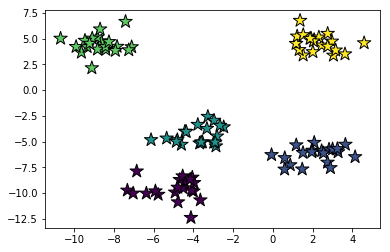

In [327]:
#plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_samples=100,n_features=5, centers=5,cluster_std=1.0, random_state=41)
plt.scatter(X1[:, 0], X1[:, 1], marker='*', c=Y1,
            s=200, edgecolor='k',)

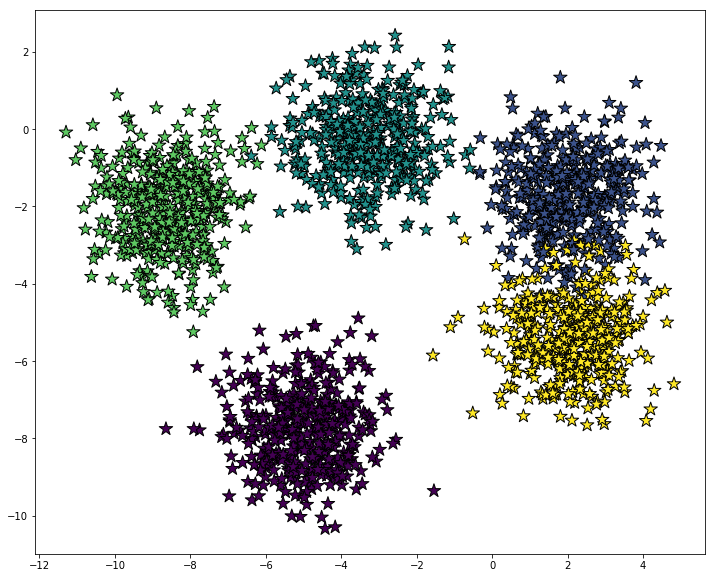

In [501]:
plt.figure(figsize=(12, 10))
X, Y = make_blobs(n_samples=2000,n_features=5, centers=5,cluster_std=1.0, random_state=41)
plt.scatter(X[:, 0], X[:, 4], marker='*', c=Y,
            s=200, edgecolor='k',)

# Concatenate the features and labels together

In [353]:
a=np.unique(Y)
fe=pd.DataFrame(X)
lbls=pd.DataFrame(Y,columns=['labels'])
All=pd.concat([fe,lbls], axis=1)
All.head(10)

,0,1,2,3,4,labels
0,-9.143426,4.349697,-2.802776,4.663451,-0.859250,3
1,0.359982,-7.646978,2.893677,6.402903,-1.384109,1
2,1.644515,-6.671982,3.291311,5.788994,-1.226740,1
3,0.272219,-6.765674,3.657495,7.517980,-2.068886,1
4,0.975931,-7.152188,2.834345,8.937418,-1.363026,1
5,1.524329,4.740747,-2.234311,-3.177861,-5.975264,4
6,-8.649935,4.066494,-2.786031,5.548283,-1.424191,3
7,1.333887,5.548809,-2.388256,-0.282263,-4.293689,4
8,2.688005,-7.183303,1.701468,5.768724,-0.928389,1
9,-3.215825,-8.623804,4.826231,-7.143088,-7.805636,0


In [500]:
A=All.sort_values(by='labels')
A.head(5)

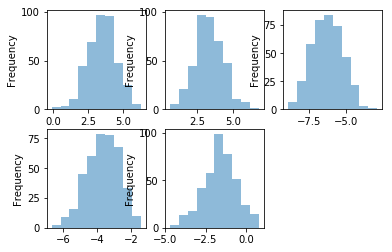

In [324]:
for i in range(0,5):
    k=i+1
    #print i,k
    c1=A.iloc[400*i:400*k,2]
    #print c1
    plt.subplot(2,3,k)
    c1.plot.hist(alpha=0.5)

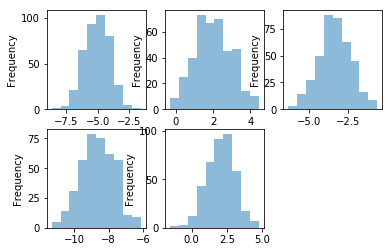

In [325]:
for i in range(0,5):
    k=i+1
    #print i,k
    c1=A.iloc[400*i:400*k,0]
    #print c1
    plt.subplot(2,3,k)
    c1.plot.hist(alpha=0.5)

667   -4.796707
898   -5.481272
374   -3.838953
371   -5.543394
370   -2.783016
Name: 0, dtype: float64

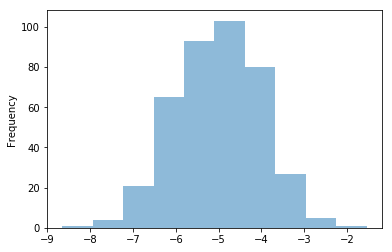

In [307]:
A=All.sort_values(by='labels')
B=A.iloc[0:400,0]
# c1=A.iloc[400:800,2]
# type(c1)
B.plot.hist(alpha=0.5)
B.head()

# Compute the covariance matrix

In [608]:
X_std = X
#StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 18.13301607  -1.18859039   5.159632     4.64991529  -0.24463486]
 [ -1.18859039  31.49847161 -11.58202875  10.62088558   2.27184631]
 [  5.159632   -11.58202875  15.91597111   0.54005816  -6.19193232]
 [  4.64991529  10.62088558   0.54005816  39.86348547  10.62854188]
 [ -0.24463486   2.27184631  -6.19193232  10.62854188   8.43268126]]


# Find the Eigen vectors and values after standarizing

In [332]:
cov_matd = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matd)
print('Covariance matrix \n%s' %cov_matd)
print('\nEigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00050025 -0.04975877  0.30386756  0.17303724 -0.01979328]
 [-0.04975877  1.00050025 -0.51753596  0.29987866  0.13946607]
 [ 0.30386756 -0.51753596  1.00050025  0.0214513  -0.53474162]
 [ 0.17303724  0.29987866  0.0214513   1.00050025  0.57998988]
 [-0.01979328  0.13946607 -0.53474162  0.57998988  1.00050025]]

Eigenvectors 
[[-0.12016235  0.06419832  0.64178485 -0.61971824 -0.43069839]
 [ 0.46094901 -0.37797583 -0.12704023  0.26033372 -0.7488307 ]
 [-0.53793298 -0.56349917  0.42563987  0.45856975  0.04051273]
 [ 0.40983973  0.47153719  0.58403151  0.50994157  0.0924709 ]
 [ 0.56191327 -0.55958397  0.22295941 -0.27901439  0.49351731]]

Eigenvalues 
[2.05408492 0.06975923 1.36246831 0.64525481 0.87093398]


In [614]:
#plt.plot(eig_vals,eig_vecs[:,1])
a=np.cov(X[:,0],X[:,3])
#plt.plot(a)
print a
#plt.scatter(X[:,0],X[:,3])

[[18.13301607  4.64991529]
 [ 4.64991529 39.86348547]]


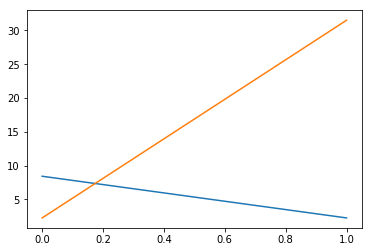

In [498]:
a=np.cov(X[:,4],X[:,1])
plt.plot(a)

# Eigendecomposition from Correlation matrix

In [186]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.12016235  0.06419832  0.64178485 -0.61971824 -0.43069839]
 [ 0.46094901 -0.37797583 -0.12704023  0.26033372 -0.7488307 ]
 [-0.53793298 -0.56349917  0.42563987  0.45856975  0.04051273]
 [ 0.40983973  0.47153719  0.58403151  0.50994157  0.0924709 ]
 [ 0.56191327 -0.55958397  0.22295941 -0.27901439  0.49351731]]

Eigenvalues 
[2.05305788 0.06972435 1.36178708 0.64493219 0.87049851]


# Eigendecomposition from raw data

In [187]:
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.12016235  0.06419832  0.64178485 -0.61971824 -0.43069839]
 [ 0.46094901 -0.37797583 -0.12704023  0.26033372 -0.7488307 ]
 [-0.53793298 -0.56349917  0.42563987  0.45856975  0.04051273]
 [ 0.40983973  0.47153719  0.58403151  0.50994157  0.0924709 ]
 [ 0.56191327 -0.55958397  0.22295941 -0.27901439  0.49351731]]

Eigenvalues 
[2.05305788 0.06972435 1.36178708 0.64493219 0.87049851]


# SVD on the covariance matrix

In [339]:
uc,sc,vc = np.linalg.svd(cov_matd)
print 'The Eigen vector :\n',uc,'\n\n', 'The singular value decomposition: \n',sc, '\n\n','The singular value decomposition: \n',vc

The Eigen vector :
[[-0.12016235 -0.64178485  0.43069839 -0.61971824 -0.06419832]
 [ 0.46094901  0.12704023  0.7488307   0.26033372  0.37797583]
 [-0.53793298 -0.42563987 -0.04051273  0.45856975  0.56349917]
 [ 0.40983973 -0.58403151 -0.0924709   0.50994157 -0.47153719]
 [ 0.56191327 -0.22295941 -0.49351731 -0.27901439  0.55958397]] 

The singular value decomposition: 
[2.05408492 1.36246831 0.87093398 0.64525481 0.06975923] 

The singular value decomposition: 
[[-0.12016235  0.46094901 -0.53793298  0.40983973  0.56191327]
 [-0.64178485  0.12704023 -0.42563987 -0.58403151 -0.22295941]
 [ 0.43069839  0.7488307  -0.04051273 -0.0924709  -0.49351731]
 [-0.61971824  0.26033372  0.45856975  0.50994157 -0.27901439]
 [-0.06419832  0.37797583  0.56349917 -0.47153719  0.55958397]]


# 3.Singular Value decomposition

In [340]:
u,s,v = np.linalg.svd(X_std.T);# A=USV.T, where A=nxm matriix, U=nxn,orthogonal matrix contain eigvect of AA.T, S=Ordered sin.values in dia sqrt of AA.T
#V=mxm orthogonal matrix contain eigen vectors of mxm
print 'The Eigen vector :\n',u,'\n\n', 'The singular value decomposition: \n',s, '\n\n','The singular value decomposition: \n',v

The Eigen vector :
[[-0.12016235 -0.64178485  0.43069839 -0.61971824 -0.06419832]
 [ 0.46094901  0.12704023  0.7488307   0.26033372  0.37797583]
 [-0.53793298 -0.42563987 -0.04051273  0.45856975  0.56349917]
 [ 0.40983973 -0.58403151 -0.0924709   0.50994157 -0.47153719]
 [ 0.56191327 -0.22295941 -0.49351731 -0.27901439  0.55958397]] 

The singular value decomposition: 
[64.07898062 52.18787363 41.72525644 35.91468183 11.80883957] 

The singular value decomposition: 
[[ 2.79924715e-02 -3.38634579e-03 -3.68581780e-03 ...  1.74722748e-02
   1.20276999e-03  1.94292957e-02]
 [ 1.30221246e-02 -3.35945200e-02 -3.68383547e-02 ...  1.06977124e-02
  -4.42343115e-03  1.56041203e-02]
 [-6.78852195e-03 -2.19768258e-02 -1.62661414e-02 ... -2.49300416e-02
   4.16241084e-02 -4.71193120e-03]
 ...
 [-6.82660315e-04 -1.43992384e-02  4.98080607e-02 ...  9.97283737e-01
   8.34040206e-04  1.10518791e-03]
 [ 2.44363055e-02  2.96146435e-02 -5.83942569e-03 ...  8.63068100e-04
   9.98169091e-01  4.50264454e-04]

In [202]:
cov=np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.12016235  0.06419832  0.64178485 -0.61971824 -0.43069839]
 [ 0.46094901 -0.37797583 -0.12704023  0.26033372 -0.7488307 ]
 [-0.53793298 -0.56349917  0.42563987  0.45856975  0.04051273]
 [ 0.40983973  0.47153719  0.58403151  0.50994157  0.0924709 ]
 [ 0.56191327 -0.55958397  0.22295941 -0.27901439  0.49351731]]

Eigenvalues 
[2.05408492 0.06975923 1.36246831 0.64525481 0.87093398]


In [349]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [409]:
type(principalComponents)
finalDf = pd.concat([principalDf, lbls['labels']], axis = 1)
finalDf.head(10)
# labels = [0,1,2,3,4]
# print type(finalDf['labels'][6])

,principal component 1,principal component 2,labels
0,-1.793729,-0.679597,3
1,0.216994,1.753227,1
2,0.236183,1.922515,1
3,0.305272,1.852137,1
4,0.017086,2.064672,1
5,0.051251,-0.138016,4
6,-1.702382,-0.558521,3
7,-0.554747,0.195606,4
8,0.036788,1.942775,1
9,2.579371,-0.303980,0


In [466]:
# print type(targets),type(finalDf['labels'])
# lbls['labels']
finalDf['labels']
finalDf.shape

(2000, 3)

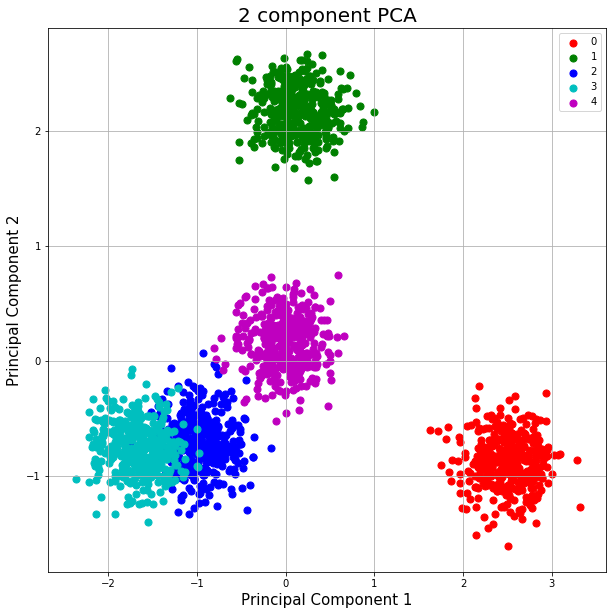

In [467]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['0', '1', '2','3','4'];
labels1 = [0,1,2,3,4]
colors = ['r', 'g', 'b','c','m']
for target, color in zip(labels1,colors):
    indicesToKeep = finalDf['labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels1)
ax.grid()

# Orginal Data represenatation

In [503]:
X[:1]

array([[-9.14342639,  4.34969746, -2.80277612,  4.66345146, -0.85924961]])

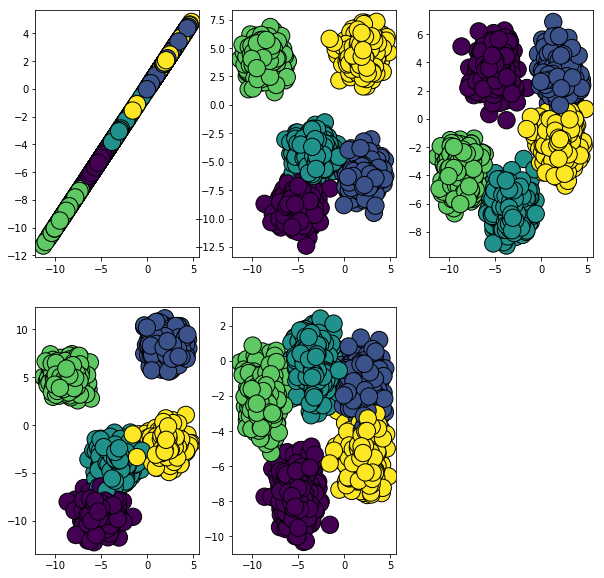

In [504]:
count=0;
fig = plt.figure(figsize = (10, 10))
for i in range(0,5):
    count+=1
    plt.subplot(2,3,count)
    plt.scatter(X[:,0], X[:, i], marker='o', c=Y, s=300, edgecolor='k',)

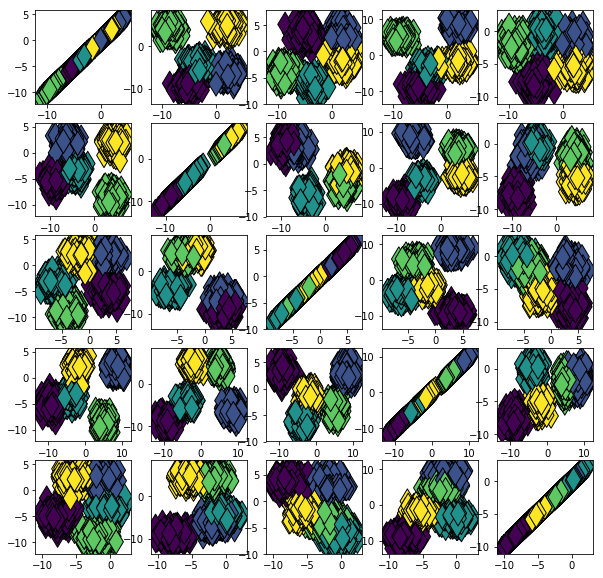

In [505]:
count=0;
fig = plt.figure(figsize = (10, 10))
for j in range(0,5):
    for i in range(0,5):
        count+=1
        plt.subplot(5,5,count)
        plt.scatter(X[:,j], X[:, i], marker='d', c=Y, s=300, edgecolor='k',)

# K-means clustering

In [458]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_std1)
kmeans.labels_[90]

1

In [439]:
kmeans.cluster_centers_

array([[ 1.07628619, -0.71219333,  1.06766125,  1.37350408,  0.60082605],
       [-1.4180749 ,  1.11198511, -0.67882009,  0.83457525,  0.47114224],
       [-0.57268563, -1.2289141 ,  1.12014927, -1.38590327, -1.48080156],
       [ 1.09198729,  1.20591421, -0.16708456, -0.29209276, -0.67205436],
       [-0.17751295, -0.3767919 , -1.34190586, -0.5300833 ,  1.08088763]])

In [445]:
pd.crosstab(Y,kmeans.labels_)

col_0,0,1,2,3,4
row_0,,,,,
0,0,0,400,0,0
1,400,0,0,0,0
2,0,0,0,0,400
3,0,400,0,0,0
4,0,0,0,400,0


In [442]:
pd.crosstab(Y,kmeans.labels_,normalize='index')

col_0,0,1,2,3,4
row_0,,,,,
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [512]:
b=[];k=range(1,8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    r= kmeans.labels_
    b.append(r)
dd=pd.DataFrame(b)
d1=dd.T
Y=np.sort(Y)

Text(0,0.5,'Accuracy')

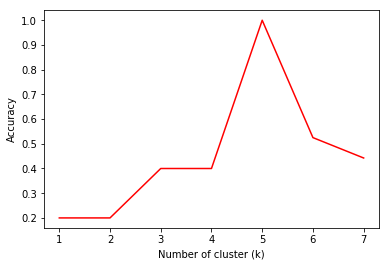

In [513]:
acc=[]
for i in range(0,7):
# #dd=pd.DataFrame(b)
    dd1=d1[i]
    #type(d1)
    pre=dd1.sort_values(ascending=True)
    b=accuracy_score(Y, pre)
    acc.append(b)
plt.plot(k,acc,color='r')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Accuracy')

In [511]:
np.sort(Y)

array([0, 0, 0, ..., 4, 4, 4])

In [545]:
# Xm=S.iloc[:,0:2]
#Xm=All.values[100:300,1:3]
# MD=sqrt((x-m).TC^-1(x-m))

In [539]:
colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            #print self.centroids

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                #print featureset.shape
                #distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                #print self.centroids[centroid]
                distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis') for centroid in self.centroids]
                distances=np.diag(distances)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        #distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis')for centroid in self.centroids]
        distances=np.diag(distances)
        classification = distances.index(min(distances))
        return classification

In [547]:
Xm=All.values[100:200,1:3]

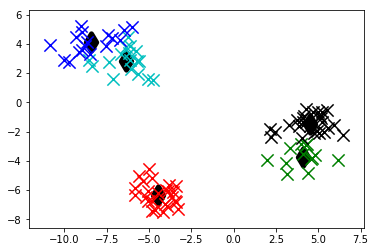

In [549]:
clf = K_Means()
clf.fit(Xm)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="d", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

In [557]:
# Test data
Xtotal=All.values[:,1:3]
Y

array([0, 0, 0, ..., 4, 4, 4])

In [561]:
clf = K_Means()
clf.fit(Xtotal)
correct = 0
b=[]
for i in range(len(Xtotal)):
    predict_me = np.array(Xtotal[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    b.append(prediction)
    #if prediction == Y[i]:
        #correct += 1
        #print correct
#print(correct*1.0/len(Xtotal))

In [607]:
cc=np.asarray(b)
cc.sort()
cc
pd.crosstab(cc,Y)
#pd.crosstab(cc,Y,normalize='index')


col_0,0,1,2,3,4
row_0,,,,,
0,400,400,0,0,0
1,0,0,364,0,0
2,0,0,36,200,0
3,0,0,0,200,0
4,0,0,0,0,400


In [604]:
#ykk=Yk.values
pd.crosstab(cc,Y,normalize='index')
# A.head(5)

col_0,0,1,2,3,4
row_0,,,,,
0,0.5,0.5,0.000000,0.000000,0.0
1,0.0,0.0,1.000000,0.000000,0.0
2,0.0,0.0,0.152542,0.847458,0.0
3,0.0,0.0,0.000000,1.000000,0.0
4,0.0,0.0,0.000000,0.000000,1.0


In [595]:
bb=Yk.values
type(bb)

numpy.ndarray

[[18.13301607  4.64991529]
 [ 4.64991529 39.86348547]]


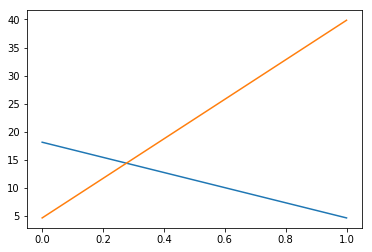

In [483]:
a=np.cov(X[:,0],X[:,3])
plt.plot(a)
print a

In [363]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


2.23606797749979

In [146]:
X_std1 = StandardScaler().fit_transform(X)
cov=np.cov(X_std1)
cov
cov.shape
print cov

[[ 1.30395136 -0.39777787 -0.50436575 ...  0.31022388 -0.27748925
   1.13987786]
 [-0.39777787  0.69547831  0.64781376 ...  0.06024794 -0.47774598
  -0.35214991]
 [-0.50436575  0.64781376  0.6218837  ...  0.0475847  -0.38515176
  -0.45303288]
 ...
 [ 0.31022388  0.06024794  0.0475847  ...  1.01660297 -0.26491266
   0.05477535]
 [-0.27748925 -0.47774598 -0.38515176 ... -0.26491266  0.7027414
  -0.2253113 ]
 [ 1.13987786 -0.35214991 -0.45303288 ...  0.05477535 -0.2253113
   1.04792246]]


In [133]:
# Covariance Matrix is the variance
covmat=np.var(X, axis=1, ddof=1)
# print covmat
cova=pd.DataFrame(covmat,columns=['Covariance'])
cova.head(10)
v=-np.sort(-cova)
v

array([[32.49686119],
       [27.45347686],
       [22.8681192 ],
       ...,
       [ 8.02728372],
       [14.7889391 ],
       [29.06222847]])

# 3.SVD

In [118]:
u, s, vh=np.linalg.svd(X)
#svdpd=pd.DataFrame(svd,columns=['SVD of Cov'])
#print svdpd.head(10)

In [218]:
vh

array([[ 0.25607447,  0.58039364, -0.10094935,  0.65175011,  0.40323704],
       [-0.49666273,  0.56701051, -0.55381144, -0.34360245, -0.08399681],
       [ 0.66258422,  0.31801487,  0.10228987, -0.64363344,  0.18740726],
       [-0.0607544 , -0.4425503 , -0.43706033, -0.12635498,  0.77037057],
       [ 0.49501824, -0.21132458, -0.69398643,  0.16410232, -0.44916826]])

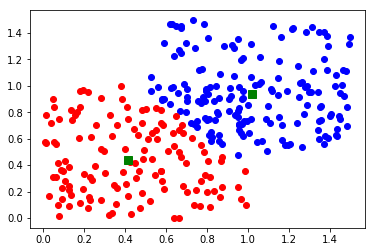

In [20]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [33]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


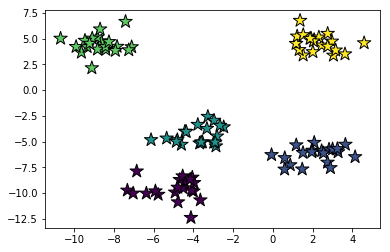

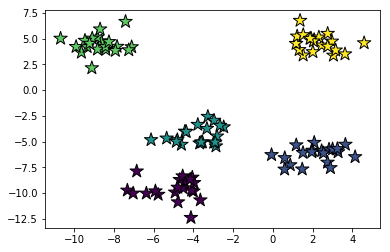

In [98]:
Y1

array([3, 3, 0, 2, 0, 1, 4, 4, 3, 2, 3, 4, 0, 3, 4, 0, 1, 4, 2, 1, 4, 2,
       1, 4, 3, 3, 4, 0, 2, 2, 0, 4, 2, 2, 1, 1, 2, 3, 1, 2, 2, 0, 4, 0,
       0, 3, 4, 1, 3, 1, 2, 2, 0, 4, 4, 3, 0, 2, 4, 4, 3, 1, 3, 3, 1, 2,
       0, 4, 1, 0, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 1, 3, 0, 2, 4, 0, 1, 2,
       1, 4, 2, 1, 3, 4, 0, 0, 1, 4, 2, 3])

In [4]:
# n_samples=1000
# centers=[(-1,-1,2,5,7),(0,0,7,9,8),(-8,1,8,-2,0),(1,0,8,0,9),(1,5,0,0,7)]
# X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=5,cluster_std=1.0,
#                   random_state=0)
# X.shape
# #y
# #plt.scatter(X[:,1],X[:,3])

In [149]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00050025 -0.04975877  0.30386756  0.17303724 -0.01979328]
 [-0.04975877  1.00050025 -0.51753596  0.29987866  0.13946607]
 [ 0.30386756 -0.51753596  1.00050025  0.0214513  -0.53474162]
 [ 0.17303724  0.29987866  0.0214513   1.00050025  0.57998988]
 [-0.01979328  0.13946607 -0.53474162  0.57998988  1.00050025]]


In [422]:
# A=np.random.normal(.5,.02,(20,6))
# sns.distplot